In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import *
import os
import csv
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:

frame = pd.read_csv("/content/drive/MyDrive/Playstore analysis/Playstore_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450795 entries, 0 to 450794
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450782 non-null  object 
 1   App Id                 450795 non-null  object 
 2   Category               450782 non-null  object 
 3   Rating                 447983 non-null  float64
 4   Rating Count           332027 non-null  float64
 5   Installs               450704 non-null  object 
 6   Minimum Installs       450782 non-null  float64
 7   Free                   450703 non-null  object 
 8   Price                  450703 non-null  float64
 9   Currency               450703 non-null  object 
 10  Size                   450767 non-null  object 
 11  Minimum Android        449713 non-null  object 
 12  Developer Id           450779 non-null  object 
 13  Developer Website      341069 non-null  object 
 14  Developer Email        450769 non-nu

Text(0.5, 1.0, 'Null Values in Data')

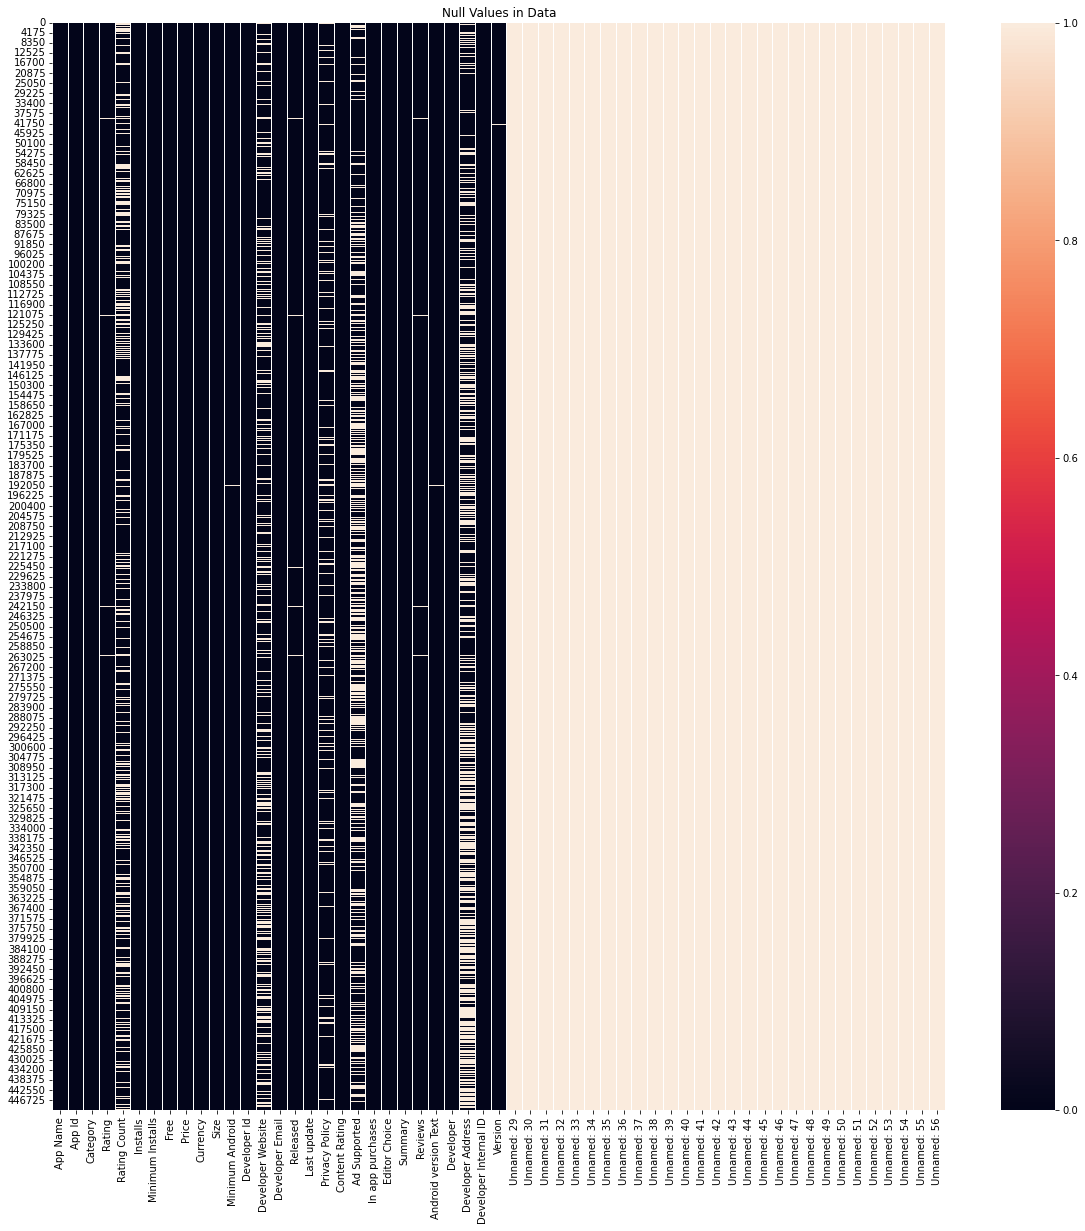

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(frame.isnull())
plt.title('Null Values in Data')

In [ ]:
list(frame)

['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last update',
 'Privacy Policy',
 'Content Rating',
 'Ad Supported',
 'In app purchases',
 'Editor Choice',
 'Summary',
 'Reviews',
 'Android version Text',
 'Developer',
 'Developer Address',
 'Developer Internal ID',
 'Version',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56']

In [ ]:
dataframe = frame.drop(['App Id','Developer Id','Developer Website','Developer Email','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33',
 'Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44',
 'Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52','Unnamed: 53','Unnamed: 54','Unnamed: 55',
 'Unnamed: 56'],axis=1)

In [ ]:
dataframe

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,5.8M,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,5.3M,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,5.7M,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,5.8M,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,5.7M,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450790,Punjabi Keyboard,Productivity,4.240000,875.0,"100,000+",100000.0,True,0.0,USD,18M,...,True,False,False,Pubjabi keyboard app which allow you to type i...,257.0,4.1 and up,Fancy Font For U,NaN,5.362128e+18,13
450791,Live 4D Wallpaper 2020 : 4K Live Backgrounds,Personalization,2.961539,52.0,"10,000+",10000.0,True,0.0,USD,6.2M,...,NaN,False,False,Unlimited Live 4D Wallpapers collection to dec...,26.0,4.2 and up,Fancy Font For U,NaN,5.362128e+18,1
450792,Rap Music Maker : Rap Beats Music Recording St...,Music & Audio,3.500000,64.0,"10,000+",10000.0,True,0.0,USD,88M,...,True,False,False,Rap Music Maker will used to make your own rap...,41.0,5.0 and up,Fancy Font For U,NaN,5.362128e+18,2.3
450793,Meetz - Cloud Meetings and Classes,Communication,NaN,NaN,"5,000+",5000.0,True,0.0,USD,Varies with device,...,NaN,False,False,Virtual meetings for everyone,NaN,Varies with device,INVENTRIX,NaN,7.185660e+18,Varies with device


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450795 entries, 0 to 450794
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450782 non-null  object 
 1   Category               450782 non-null  object 
 2   Rating                 447983 non-null  float64
 3   Rating Count           332027 non-null  float64
 4   Installs               450704 non-null  object 
 5   Minimum Installs       450782 non-null  float64
 6   Free                   450703 non-null  object 
 7   Price                  450703 non-null  float64
 8   Currency               450703 non-null  object 
 9   Size                   450767 non-null  object 
 10  Minimum Android        449713 non-null  object 
 11  Released               447348 non-null  object 
 12  Last update            450795 non-null  object 
 13  Privacy Policy         399946 non-null  object 
 14  Content Rating         450782 non-nu

In [ ]:
list(dataframe)

['App Name',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Released',
 'Last update',
 'Privacy Policy',
 'Content Rating',
 'Ad Supported',
 'In app purchases',
 'Editor Choice',
 'Summary',
 'Reviews',
 'Android version Text',
 'Developer',
 'Developer Address',
 'Developer Internal ID',
 'Version']

In [ ]:
dataframe_1 = dataframe.drop(['Developer Address',
 'Developer Internal ID','Summary','Privacy Policy'],axis=1)

Text(0.5, 1.0, 'Null Values in Data')

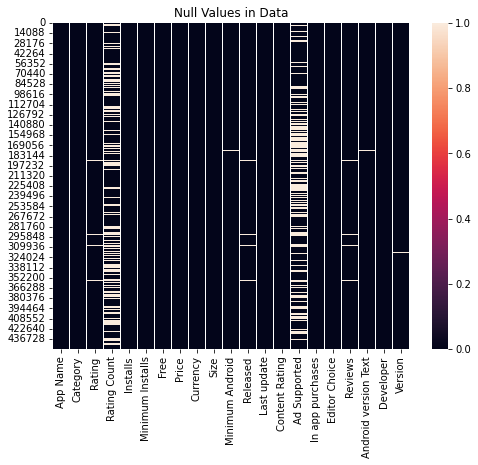

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(dataframe_1.isnull())
plt.title('Null Values in Data')

In [ ]:
dataframe_1

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,...,Released,Last update,Content Rating,Ad Supported,In app purchases,Editor Choice,Reviews,Android version Text,Developer,Version
0,Logistics Management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,5.8M,...,"Jul 19, 2017","July 19, 2017",Everyone,True,False,False,28.0,4.0 and up,eniseistudio,1.1.5
1,Estados Unidos Noticias,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,5.3M,...,"May 5, 2017","May 5, 2017",Everyone,True,False,False,3.0,4.0 and up,eniseistudio,1.2.3
2,Dental Assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,5.7M,...,"Jul 18, 2017","July 18, 2017",Everyone,True,False,False,3.0,4.0 and up,eniseistudio,1.1.5
3,Medical Assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,5.8M,...,"Jun 24, 2017","June 24, 2017",Everyone,True,False,False,7.0,4.0 and up,eniseistudio,1.1.4
4,Business Administration,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,5.7M,...,"Jun 13, 2017","October 6, 2017",Everyone,True,False,False,29.0,4.0 and up,eniseistudio,1.1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450790,Punjabi Keyboard,Productivity,4.240000,875.0,"100,000+",100000.0,True,0.0,USD,18M,...,"Jul 15, 2015","June 26, 2020",Everyone,True,False,False,257.0,4.1 and up,Fancy Font For U,13
450791,Live 4D Wallpaper 2020 : 4K Live Backgrounds,Personalization,2.961539,52.0,"10,000+",10000.0,True,0.0,USD,6.2M,...,"Sep 13, 2020","September 13, 2020",Everyone,NaN,False,False,26.0,4.2 and up,Fancy Font For U,1
450792,Rap Music Maker : Rap Beats Music Recording St...,Music & Audio,3.500000,64.0,"10,000+",10000.0,True,0.0,USD,88M,...,"Aug 7, 2020","April 22, 2021",Everyone,True,False,False,41.0,5.0 and up,Fancy Font For U,2.3
450793,Meetz - Cloud Meetings and Classes,Communication,NaN,NaN,"5,000+",5000.0,True,0.0,USD,Varies with device,...,NaN,"July 28, 2020",Everyone,NaN,False,False,NaN,Varies with device,INVENTRIX,Varies with device


In [ ]:
dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450795 entries, 0 to 450794
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   App Name              450782 non-null  object 
 1   Category              450782 non-null  object 
 2   Rating                447983 non-null  float64
 3   Rating Count          332027 non-null  float64
 4   Installs              450704 non-null  object 
 5   Minimum Installs      450782 non-null  float64
 6   Free                  450703 non-null  object 
 7   Price                 450703 non-null  float64
 8   Currency              450703 non-null  object 
 9   Size                  450767 non-null  object 
 10  Minimum Android       449713 non-null  object 
 11  Released              447348 non-null  object 
 12  Last update           450795 non-null  object 
 13  Content Rating        450782 non-null  object 
 14  Ad Supported          281064 non-null  object 
 15  

In [ ]:
dataframe_1.isna().sum()

App Name                    13
Category                    13
Rating                    2812
Rating Count            118768
Installs                    91
Minimum Installs            13
Free                        92
Price                       92
Currency                    92
Size                        28
Minimum Android           1082
Released                  3447
Last update                  0
Content Rating              13
Ad Supported            169731
In app purchases             0
Editor Choice                0
Reviews                   2812
Android version Text      1082
Developer                   16
Version                    173
dtype: int64

In [ ]:
dataframe_2 = dataframe_1.drop(450793,axis=0)

In [ ]:
dataframe_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450794 entries, 0 to 450794
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   App Name              450781 non-null  object 
 1   Category              450781 non-null  object 
 2   Rating                447983 non-null  float64
 3   Rating Count          332027 non-null  float64
 4   Installs              450703 non-null  object 
 5   Minimum Installs      450781 non-null  float64
 6   Free                  450702 non-null  object 
 7   Price                 450702 non-null  float64
 8   Currency              450702 non-null  object 
 9   Size                  450766 non-null  object 
 10  Minimum Android       449712 non-null  object 
 11  Released              447348 non-null  object 
 12  Last update           450794 non-null  object 
 13  Content Rating        450781 non-null  object 
 14  Ad Supported          281064 non-null  object 
 15  

In [ ]:
dataframe_2.shape

(450794, 21)

In [ ]:
list(dataframe_2['App Name'])

['Logistics Management',
 'Estados Unidos Noticias',
 'Dental Assistant',
 'Medical Assistant',
 'Business Administration',
 'Economics',
 'Cosmetology',
 'Learn Python',
 'Quality Management',
 'Tourism Management',
 'Early Learning App - Kids Piano & Puzzles',
 'Early Learning App For Kids',
 'Desert Runner Boy',
 'ABC Kids - Alphabet & Number Tracing & Phonics',
 'Kids Word Games: Early Learning',
 'Early Learning for Kindergarten Kids: ABC, Rhymes',
 'Word Link: Word Connect Puzzle Game',
 'Math Kids Game',
 'Best Time to Get Pregnant',
 'Communication in Relationships - Tips and Guides',
 'SMOOTH PICK UP LINES',
 'Types Of Martial Arts',
 'Dating Questions',
 'DATE IDEAS - Guide',
 'Age Gap Relationships - Guide',
 'How to Conceive a Girl - Guide',
 'EARLY CHILDHOOD EDUCATION - Guide and Knowledge',
 'Benefits of Hot Yoga - Knowledge and Tips',
 'Worksheets: Preschool & Kindergarten Learning',
 'Kids Academy: Pre-K-3 learning & educational games',
 'Kindergarten Math & Reading - P

In [ ]:
dataframe_2.isna().sum()

App Name                    13
Category                    13
Rating                    2811
Rating Count            118767
Installs                    91
Minimum Installs            13
Free                        92
Price                       92
Currency                    92
Size                        28
Minimum Android           1082
Released                  3446
Last update                  0
Content Rating              13
Ad Supported            169730
In app purchases             0
Editor Choice                0
Reviews                   2811
Android version Text      1082
Developer                   16
Version                    173
dtype: int64

In [ ]:
dataframe_2 = dataframe_2.drop(['Rating Count',
           'Minimum Installs', 
           'Price', 
           'Currency', 
           'Minimum Android', 
           'Last update', 
           'Ad Supported',
           'In app purchases', 
           'Editor Choice', 
           'Version'],axis=1)

Text(0.5, 1.0, 'Null Values in Data')

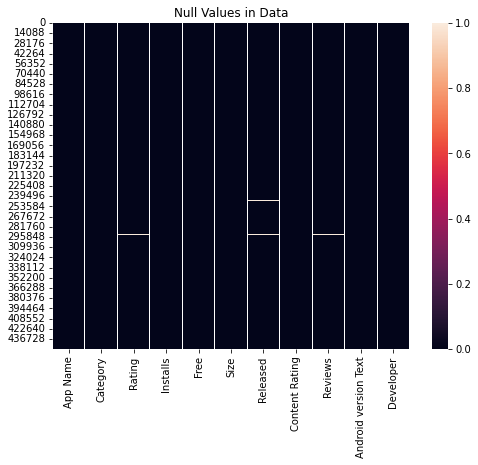

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(dataframe_2.isnull())
plt.title('Null Values in Data')

In [ ]:
dataframe_2.isna().sum()

App Name                  13
Category                  13
Rating                  2811
Installs                  91
Free                      92
Size                      28
Released                3446
Content Rating            13
Reviews                 2811
Android version Text    1082
Developer                 16
dtype: int64

In [ ]:
dataframe_2 = dataframe_2[~dataframe_2['App Name'].isnull()]

In [ ]:
dataframe_2 = dataframe_2[~dataframe_2['Rating'].isnull()]
dataframe_2 = dataframe_2[~dataframe_2['Released'].isnull()]

In [ ]:
dataframe_2.isna().sum()

App Name                   0
Category                   0
Rating                     0
Installs                   0
Free                       0
Size                       0
Released                   0
Content Rating             0
Reviews                    0
Android version Text    1066
Developer                  3
dtype: int64

In [ ]:
dataframe_2 = dataframe_2.drop(['Android version Text','Developer'],axis=1)

Text(0.5, 1.0, 'Null Values in Data')

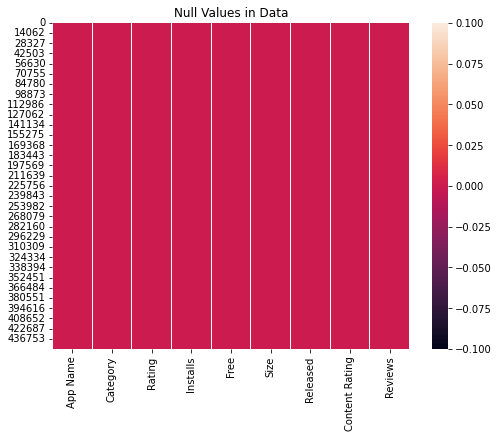

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(dataframe_2.isnull())
plt.title('Null Values in Data')


In [ ]:
dataframe_2.dtypes

App Name           object
Category           object
Rating            float64
Installs           object
Free               object
Size               object
Released           object
Content Rating     object
Reviews           float64
dtype: object

In [ ]:
dataframe_2['Installs'] = dataframe_2['Installs'].replace({',': ''}, regex=True)

In [ ]:
def strip_installs(data):
    return data.split('+')[0]

In [ ]:
dataframe_2['Installs'] = dataframe_2['Installs'].apply(lambda x: f"{strip_installs(x)}")


In [ ]:
dataframe_2['Installs'] = dataframe_2['Installs'].astype(int)

In [ ]:
dataframe_2['Free'] = dataframe_2['Free'].astype('bool')

dataframe_2['Reviews'] = dataframe_2['Reviews'].astype('int64')

In [ ]:
dataframe_2.dtypes

App Name           object
Category           object
Rating            float64
Installs            int64
Free                 bool
Size               object
Released           object
Content Rating     object
Reviews             int64
dtype: object

In [ ]:
dataframe_2.dtypes

App Name           object
Category           object
Rating            float64
Installs            int64
Free                 bool
Size               object
Released           object
Content Rating     object
Reviews             int64
dtype: object

In [ ]:
dataframe_3 = dataframe_2


In [ ]:
dataframe_3

,App Name,Category,Rating,Installs,Free,Size,Released,Content Rating,Reviews
0,Logistics Management,Education,4.090909,10000,True,5.8M,"Jul 19, 2017",Everyone,28
1,Estados Unidos Noticias,News & Magazines,4.000000,1000,True,5.3M,"May 5, 2017",Everyone,3
2,Dental Assistant,Education,3.866667,10000,True,5.7M,"Jul 18, 2017",Everyone,3
3,Medical Assistant,Education,4.000000,5000,True,5.8M,"Jun 24, 2017",Everyone,7
4,Business Administration,Education,4.023256,50000,True,5.7M,"Jun 13, 2017",Everyone,29
...,...,...,...,...,...,...,...,...,...
450789,Sinhala Keyboard,Productivity,4.370000,50000,True,13M,"Nov 2, 2015",Everyone,87
450790,Punjabi Keyboard,Productivity,4.240000,100000,True,18M,"Jul 15, 2015",Everyone,257
450791,Live 4D Wallpaper 2020 : 4K Live Backgrounds,Personalization,2.961539,10000,True,6.2M,"Sep 13, 2020",Everyone,26
450792,Rap Music Maker : Rap Beats Music Recording St...,Music & Audio,3.500000,10000,True,88M,"Aug 7, 2020",Everyone,41


In [ ]:
Category = dataframe_2.groupby(['Category'])['App Name'].count().reset_index().rename(columns={'App Name':'Count of Apps'})
Category = Category.sort_values(by=['Count of Apps'],ascending = False)
Category.set_index('Category', inplace= True)
Category.head(10)

,Count of Apps
Category,
Education,46560
Tools,33567
Books & Reference,29855
Personalization,29644
Music & Audio,28340
Entertainment,22103
Lifestyle,18851
Business,16423
Productivity,14598


In [ ]:
dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447301 entries, 0 to 450794
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        447301 non-null  object 
 1   Category        447301 non-null  object 
 2   Rating          447301 non-null  float64
 3   Installs        447301 non-null  int64  
 4   Free            447301 non-null  bool   
 5   Size            447301 non-null  object 
 6   Released        447301 non-null  object 
 7   Content Rating  447301 non-null  object 
 8   Reviews         447301 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 31.1+ MB


In [ ]:
(dataframe_3['Category'].unique())


array(['Education', 'News & Magazines', 'Adventure', 'Educational',
       'Health & Fitness', 'Lifestyle', 'Dating', 'Sports',
       'Entertainment', 'Food & Drink', 'Word', 'Role Playing', 'Arcade',
       'Strategy', 'Puzzle', 'Productivity', 'Simulation', 'Tools',
       'Casual', 'Music & Audio', 'Action', 'Business', 'Art & Design',
       'Music', 'Parenting', 'House & Home', 'Auto & Vehicles', 'Trivia',
       'Racing', 'Board', 'Books & Reference', 'Beauty',
       'Personalization', 'Photography', 'Finance', 'Communication',
       'Shopping', 'Social', 'Casino', 'Comics', 'Travel & Local',
       'Medical', 'Libraries & Demo', 'Events', 'Card', 'Weather',
       'Maps & Navigation', 'Video Players & Editors'], dtype=object)

In [ ]:
dataframe_3['Category'].unique()

array(['Education', 'News & Magazines', 'Adventure', 'Educational',
       'Health & Fitness', 'Lifestyle', 'Dating', 'Sports',
       'Entertainment', 'Food & Drink', 'Word', 'Role Playing', 'Arcade',
       'Strategy', 'Puzzle', 'Productivity', 'Simulation', 'Tools',
       'Casual', 'Music & Audio', 'Action', 'Business', 'Art & Design',
       'Music', 'Parenting', 'House & Home', 'Auto & Vehicles', 'Trivia',
       'Racing', 'Board', 'Books & Reference', 'Beauty',
       'Personalization', 'Photography', 'Finance', 'Communication',
       'Shopping', 'Social', 'Casino', 'Comics', 'Travel & Local',
       'Medical', 'Libraries & Demo', 'Events', 'Card', 'Weather',
       'Maps & Navigation', 'Video Players & Editors'], dtype=object)

In [ ]:
(dataframe_3['Category'] == 0).sum()
dataframe_3['Category'] = dataframe_3['Category'].replace(0,'Not Specified')

In [ ]:
dataframe_3

,App Name,Category,Rating,Installs,Free,Size,Released,Content Rating,Reviews
0,Logistics Management,Education,4.090909,10000,True,5.8M,"Jul 19, 2017",Everyone,28
1,Estados Unidos Noticias,News & Magazines,4.000000,1000,True,5.3M,"May 5, 2017",Everyone,3
2,Dental Assistant,Education,3.866667,10000,True,5.7M,"Jul 18, 2017",Everyone,3
3,Medical Assistant,Education,4.000000,5000,True,5.8M,"Jun 24, 2017",Everyone,7
4,Business Administration,Education,4.023256,50000,True,5.7M,"Jun 13, 2017",Everyone,29
...,...,...,...,...,...,...,...,...,...
450789,Sinhala Keyboard,Productivity,4.370000,50000,True,13M,"Nov 2, 2015",Everyone,87
450790,Punjabi Keyboard,Productivity,4.240000,100000,True,18M,"Jul 15, 2015",Everyone,257
450791,Live 4D Wallpaper 2020 : 4K Live Backgrounds,Personalization,2.961539,10000,True,6.2M,"Sep 13, 2020",Everyone,26
450792,Rap Music Maker : Rap Beats Music Recording St...,Music & Audio,3.500000,10000,True,88M,"Aug 7, 2020",Everyone,41


In [ ]:
dataframe_3['Category']

0                Education
1         News & Magazines
2                Education
3                Education
4                Education
                ...       
450789        Productivity
450790        Productivity
450791     Personalization
450792       Music & Audio
450794             Finance
Name: Category, Length: 447301, dtype: object

In [ ]:
lst = list(pd.unique(dataframe_3['Category']))

In [ ]:
lst

['Education',
 'News & Magazines',
 'Adventure',
 'Educational',
 'Health & Fitness',
 'Lifestyle',
 'Dating',
 'Sports',
 'Entertainment',
 'Food & Drink',
 'Word',
 'Role Playing',
 'Arcade',
 'Strategy',
 'Puzzle',
 'Productivity',
 'Simulation',
 'Tools',
 'Casual',
 'Music & Audio',
 'Action',
 'Business',
 'Art & Design',
 'Music',
 'Parenting',
 'House & Home',
 'Auto & Vehicles',
 'Trivia',
 'Racing',
 'Board',
 'Books & Reference',
 'Beauty',
 'Personalization',
 'Photography',
 'Finance',
 'Communication',
 'Shopping',
 'Social',
 'Casino',
 'Comics',
 'Travel & Local',
 'Medical',
 'Libraries & Demo',
 'Events',
 'Card',
 'Weather',
 'Maps & Navigation',
 'Video Players & Editors']

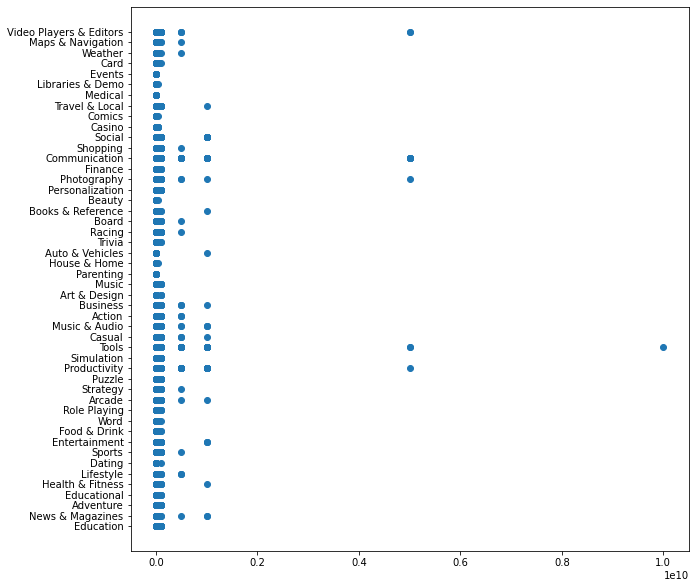

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(dataframe_3['Installs'],dataframe_3['Category'])
plt.show()

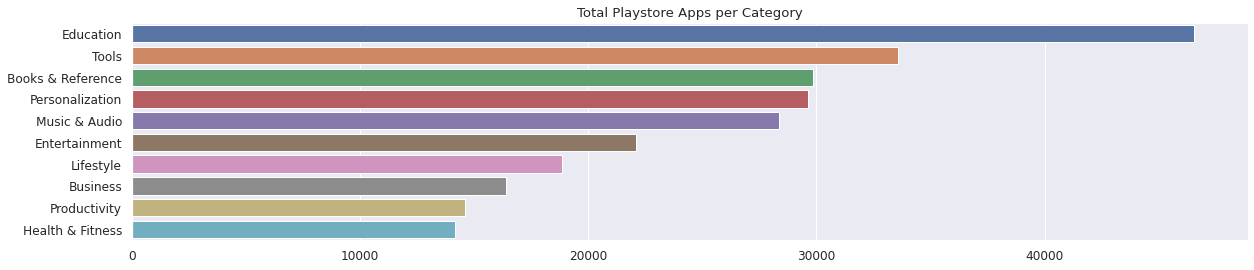

In [ ]:
plt.figure(figsize = (20, 4))
sns.set(font_scale = 1.1)

cat = dataframe_3['Category'].value_counts()
high_cat = cat.nlargest(10)
plt.title('Total Playstore Apps per Category')
ax = sns.barplot(y=high_cat.index, x=high_cat.values)

plt.show()

In [ ]:
dataframe_3.info()

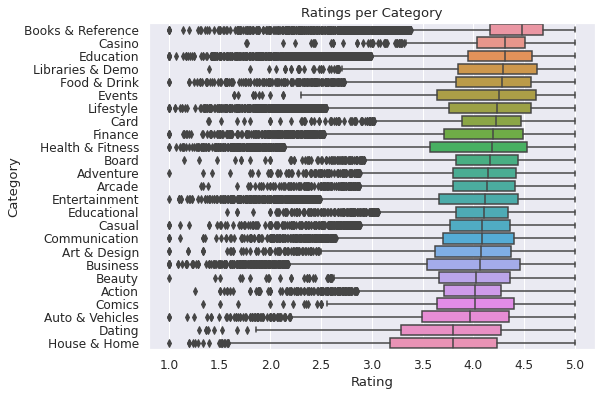

In [ ]:
plt.figure(figsize=(8, 6))

median_ratings = dataframe_3[dataframe_3['Rating'] > 0].groupby('Category')['Rating'].median()[:25]
plot_order = median_ratings.sort_values(ascending = False).index
plt.title('Ratings per Category')
sns.boxplot(x = 'Rating', y = 'Category', data = dataframe_3[dataframe_3['Rating'] > 0], order = plot_order)

plt.show()

In [ ]:
 Installs_Cat = dataframe_3.groupby(['Category'])['Installs'].sum().sort_values().reset_index()
Installs_Cat.head(10)

,Category,Installs
0,Events,45234723
1,Parenting,179921559
2,Libraries & Demo,260034943
3,Comics,281563828
4,House & Home,305412111
5,Beauty,317055560
6,Medical,344110144
7,Dating,488054102
8,Trivia,852367930
9,Casino,1001696821


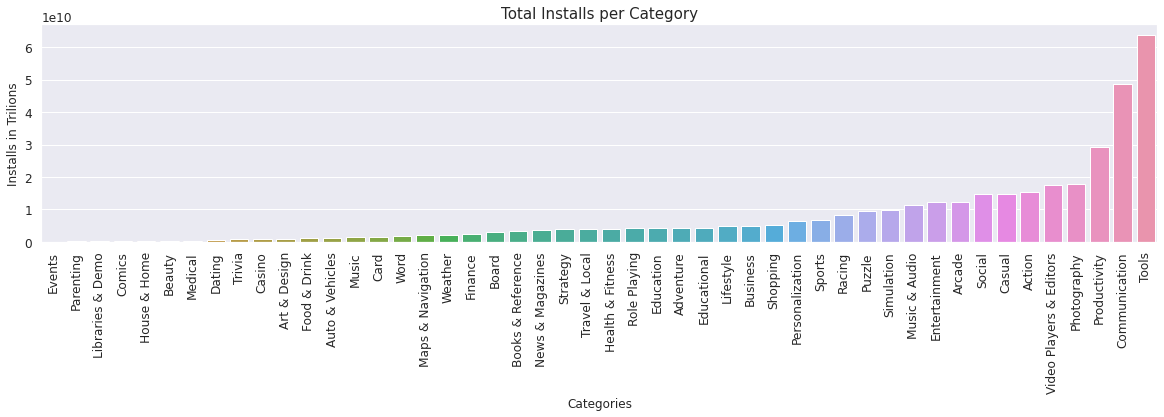

In [ ]:
plt.figure(figsize = (20, 4))
sns.barplot(x = Installs_Cat['Category'], y = Installs_Cat['Installs'])
plt.xlabel('Categories', fontsize = 12)
plt.ylabel('Installs in Trilions', fontsize = 12)
plt.xticks(rotation = 90)
plt.title('Total Installs per Category', fontsize = 15)
plt.show()

In [ ]:
medical = dataframe_3[dataframe_3['Category']==('Medical')]
print('The dataset contains '+ (str((medical['App Name'].nunique())))+ ' medical apps.')

high_installs = medical.groupby("App Name")["Installs"].sum().nlargest(8).index.tolist()
high_installs

The dataset contains 4853 medical apps.


['Blood Pressure',
 'CUIDAR COVID-19 ARGENTINA',
 'GoodRx: Prescription Drugs Discounts & Coupons App',
 'My Calendar - Period Tracker',
 'MyChart',
 'WebMD: Check Symptoms, Rx Savings, & Find Doctors',
 'AMMA Pregnancy Tracker & Baby Due Date Calculator',
 'Ada – check your health']

In [ ]:
def fuc(row):
    if row["App Name"] not in high_installs:
        return("Others")
    else:
        return row['App Name']

In [ ]:
medical['Top_Installed_Product'] = medical.apply(fuc,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


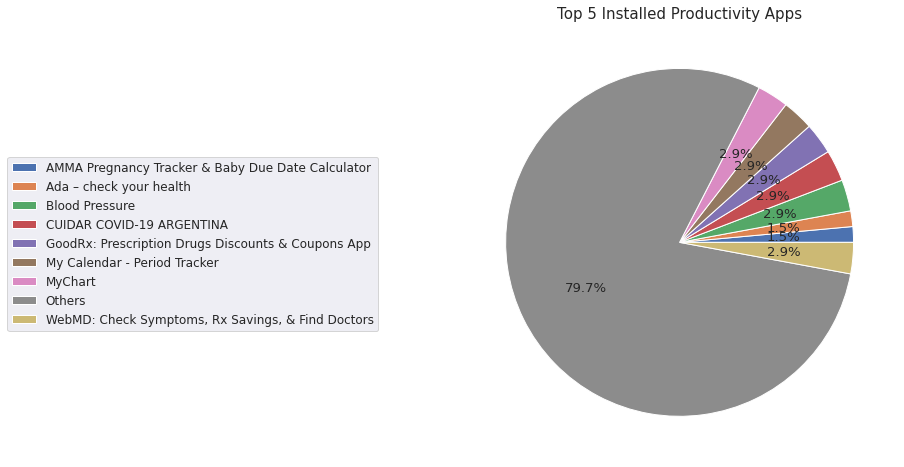

In [ ]:
top_install = medical.groupby("Top_Installed_Product")["Installs"].sum()

plt.subplots(figsize = (8, 8))

explode = (0.1,0.1,0.1,0,0.1,0)

top_install_index = top_install.index

labels = top_install.index

ax.set(facecolor = 'grey')

pie = plt.pie(top_install,  startangle = 0, autopct = '%1.1f%%')

plt.legend(pie[0], labels, bbox_to_anchor = (0, 0.5), loc = "center right", fontsize = 12, bbox_transform = plt.gcf().transFigure)

plt.title('Top 5 Installed Productivity Apps', fontsize = 15)

plt.show()